# IMPORTAR DADOS COM DIFERENTES FORMATOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from cycler import cycler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

#MERGE ALL FEATURES
from functools import reduce

#INTERATIVE MAP
import plotly.express as px

#REGRESSION
import statsmodels.api as sm

#ELBOW GRAPHIC
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#HIERARCHICAL CLUSTERING
from collections import defaultdict
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib.colors import rgb2hex, colorConverter
from scipy.cluster.hierarchy import set_link_color_palette
import pandas as pd
import scipy.cluster.hierarchy as sch

#KMEANS
from sklearn.cluster import KMeans

#TIME SERIES ANALYSIS 
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf


//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def import_data(path,extension):
    if extension == 'csv':
        df=pd.read_csv(path,skiprows=4)
        pd.options.display.float_format = '{:.0f}'.format
        return df
    elif extension == 'xlsx':
        df=pd.read_excel(path)
        pd.options.display.float_format = '{:,.0f}'.format
        return df
    elif extension == 'txt':
        df=pd.read_fwf(path)
        return df
    elif extension == 'html':
        df=pd.read_html(path , header=0)
        return df  
    elif extension == 'json': 
        df=pd.read_json(path)#lines=True)
   
        return df
    else:
        print("You may have written the extension wrong, type:'csv', 'xlsx' or 'txt'")  
        

def imp_other(path,extension):
    
    if extension == 'csv':
        df=pd.read_csv(path,skiprows=4)
        pd.options.display.float_format = '{:,.4f}'.format
        return df
        
#Treat ruleoflaw Dataset
def imp_other(path,extension):
    
    if extension == 'xlsx':
        df=pd.read_excel(path,skiprows=4)
        pd.options.display.float_format = '{:,.4f}'.format
        return df

    elif extension == 'csv':
        df=pd.read_csv(path,skiprows=4)
        pd.options.display.float_format = '{:,.4f}'.format
        return df

In [3]:
path_arrivals = 'arrivals.csv'
arrivals=import_data(path_arrivals,'csv')

path_departures = 'departures.csv'
departures=import_data(path_departures,'csv')

path_continents='continents.xlsx'
continents=import_data(path_continents,'xlsx')
continents = continents.rename(columns = {'ISO3v10' : 'Country Code'})

#Import more variables
path_ruleoflaw = 'ruleoflaw.xlsx'
ruleoflaw = imp_other(path_ruleoflaw,'xlsx')

path_cpi = 'cpi.csv'
cpi=imp_other(path_cpi,'csv')

path_gdp = 'gdp%.csv'
gdp=imp_other(path_gdp,'csv')

path_unemployment = 'unemployment.csv'
unemployment = imp_other(path_unemployment,'csv')

# PRE-PROCESSING 

In [4]:
#Selecionar os 10 ultimos anos:
def select_col (dataframe):
    df = dataframe.loc[:,['Country Code','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
    return df

# Eliminar duplicados
def drop_dupl (dataframe):
    df= dataframe.drop_duplicates() 
    return df

# Eliminate Null/Nan Columns
def treat_columns(dataframe):
    global df
    df = dataframe.dropna(axis=1, how='all')
    return df


# Verify values per country
def missing (dataframe):
    
    df['Countnan'] = dataframe.apply(lambda x:x.count(),axis=1)    
    return df
        

# Delete row with more than 3 null/nan values
def delete_rows (dataframe):
    
    indexnames = df[df['Countnan'] <= (len(df.columns)-5)].index
    df.drop(indexnames,inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df



# Delete the column created to count the null values
def delete_countnan (dataframe):
    
    df = dataframe.drop('Countnan',1)
    return df


# Replace the null values with the average of that row, in this case, with the average of that Country
def nan_por_average(dataframe):
    
    value = df.mean(axis=1)
    for i, col in enumerate(df):
        df.iloc[:, i] = df.iloc[:, i].fillna(value)
    return df


def continent(dataframe,continents):
    
    df = pd.DataFrame.merge(dataframe, continents, on = 'Country Code')
    return df

#Melt arrivals:
def melt_df(dataframe,variavel):
    
    df= pd.melt(dataframe,id_vars = ['Country Code'], value_vars = dataframe.iloc[:, 1:12], value_name = variavel ,var_name = 'Years')
    return df
    



In [5]:
#Treat arrivals Dataset
arrivals_t = select_col(arrivals)
arrivals_t= drop_dupl(arrivals_t)
arrivals_t = treat_columns(arrivals_t)
arrivals_t = missing(arrivals_t)
arrivals_t = delete_rows(arrivals_t)
arrivals_t = nan_por_average(arrivals_t) 
arrivals_t = delete_countnan(arrivals_t)
arrivals_t = continent(arrivals_t,continents)

#Melt
dfarrivals= pd.melt(arrivals_t,id_vars = ['Country Code'], value_vars = arrivals_t.iloc[:, 1:12], value_name = 'Arrivals',var_name = 'Years')

#arrivals
#dfarrivals

In [6]:
#Treat departures Dataset
departures = select_col(departures)
departures= drop_dupl(departures)
departures = treat_columns(departures)
departures = missing(departures)
departures = delete_rows(departures)
departures = nan_por_average(departures) 
departures = delete_countnan(departures)

#Melt
dfdepartures= pd.melt(departures,id_vars = ['Country Code'], value_vars = departures.iloc[:, 1:12], value_name = 'Departures',var_name = 'Years')

#departures
#dfdepartures

In [7]:
#Treat ruleoflaw Dataset
ruleoflaw2 = ruleoflaw.iloc[:,10:21].copy()
ruleoflaw1 = ruleoflaw.loc[:,'Code'].copy()

ruleoflaw_final = pd.concat([ruleoflaw1, ruleoflaw2],axis=1)
ruleoflaw_final = ruleoflaw_final.rename(columns={'Code': 'Country Code'})
ruleoflaw_final = treat_columns(ruleoflaw_final)
ruleoflaw_final = missing(ruleoflaw_final)
ruleoflaw_final = delete_rows(ruleoflaw_final)
ruleoflaw_final = nan_por_average(ruleoflaw_final)
ruleoflaw_final = delete_countnan(ruleoflaw_final)

#Melt
dfruleoflaw= pd.melt(ruleoflaw_final,id_vars = ['Country Code'], value_vars = ruleoflaw_final.iloc[:, 1:12], value_name = 'Rule of Law',var_name = 'Years')

#dfruleoflaw
#ruleoflaw_final


In [8]:
#Treat cpi Dataset        
cpi = select_col(cpi)
cpi= drop_dupl(cpi)
cpi = treat_columns(cpi)
cpi = missing(cpi)
cpi = delete_rows(cpi)
cpi = nan_por_average(cpi) 
cpi = delete_countnan(cpi)

#Melt
dfcpi= pd.melt(cpi,id_vars = ['Country Code'], value_vars = cpi.iloc[:, 1:12], value_name = 'CPI %',var_name = 'Years')

#dfcpi
#cpi

In [9]:
#Treat gdp Dataset
gdp = select_col(gdp)
gdp= drop_dupl(gdp)
gdp = treat_columns(gdp)
gdp = missing(gdp)
gdp = delete_rows(gdp)
gdp = nan_por_average(gdp) 
gdp = delete_countnan(gdp)

#Melt
dfgdp= pd.melt(gdp,id_vars = ['Country Code'], value_vars = gdp.iloc[:, 1:12], value_name = 'GDP PC',var_name = 'Years')

#dfgdp
#gdp

In [10]:
#Treat unemployment Dataset
unemployment = select_col(unemployment)
unemployment= drop_dupl(unemployment)
unemployment = treat_columns(unemployment)
unemployment = missing(unemployment)
unemployment = delete_rows(unemployment)
unemployment = nan_por_average(unemployment) 
unemployment = delete_countnan(unemployment)

#Melt
dfunemployment= pd.melt(unemployment,id_vars = ['Country Code'], value_vars = unemployment.iloc[:, 1:12], value_name = 'Unemployment %',var_name = 'Years')

#dfunemployment
#unemployment

In [11]:
#Merge all features
dfarrivals['Years'] = dfarrivals['Years'].astype(int)
dfdepartures['Years'] = dfdepartures['Years'].astype(int)
dfruleoflaw['Years'] = dfruleoflaw['Years'].astype(int)
dfcpi['Years'] = dfcpi['Years'].astype(int)
dfgdp['Years'] = dfgdp['Years'].astype(int)
dfunemployment['Years'] = dfunemployment['Years'].astype(int)



dfs = [dfarrivals, dfdepartures, dfruleoflaw, dfcpi, dfgdp, dfunemployment]
df_final = reduce(lambda left,right: pd.merge(left,right,on=['Country Code', 'Years']), dfs)


df_final['Arrivals'] = df_final['Arrivals'].astype(int)
df_final['Departures'] = df_final['Departures'].astype(int)

df_final



Country Code  Years  Arrivals  Departures  Rule of Law   CPI %  \
0            ALB   2007   1062000     2979000      -0.6463  2.9327   
1            ARM   2007    511000      468000      -0.4984  4.4074   
2            AUS   2007   5644000     5462000       1.7612  2.3276   
3            AUT   2007  20773000     9876000       1.9601  2.1686   
4            AZE   2007    732000     1631000      -0.8793 16.6613   
5            BEL   2007   7045000     8371000       1.3307  1.8231   
6            BGR   2007   5151000     4515000      -0.0460  8.4025   
7            BLR   2007    105000      517000      -1.2092  8.4268   
8            BOL   2007    573000      526000      -0.8301  8.7056   
9            BRA   2007   5026000     4662000      -0.3710  3.6413   
10           CAN   2007  17935000    25163000       1.8147  2.1384   
11           CHE   2007   8448000    11079273       1.8457  0.7323   
12           CHL   2007   2507000     2047000       1.2884  4.4078   
13           CHN   2007  54720000    40954000      -0.5422  4.8168   
14           COL   2007   2254000     2028000      -0.4359  5.5451   
15           CRI   2007   1980000      577000       0.3819  9.3570   
16           CZE   2007   6680000     9048000       0.9059  2.8531   
17           DEU   2007  24421000    82099000       1.7730  2.2983   
18           DNK   2007   9832000     6564000       2.0137  1.6933   
19           DOM   2007   3980000      443000      -0.6136  6.1436   
20           DZA   2007   1743000     1499000      -0.7727  3.6790   
21           ECU   2007    937000      801000      -1.0350  2.2762   
22           ESP   2007  58666000    11276000       1.1683  2.7870   
23           EST   2007   1900000      677000       1.1730  6.6013   
24           FIN   2007   2472000     5749000       1.9149  2.5107   
25           FJI   2007    540000      120000      -0.6009  4.8037   
26           FRA   2007  80853000    28103000       1.4723  1.4880   
27           GBR   2007  30870000    69450000       1.7374  2.3866   
28           GRC   2007  16165000     4784364       0.8724  2.8950   
29           GTM   2007   1628000     1168000      -1.1154  6.8216   
..           ...    ...       ...         ...          ...     ...   
927          NIC   2017   1787000      982000      -0.6449  3.8507   
928          NLD   2017  17924000    16531637       1.8300  1.3815   
929          NOR   2017   6252000     8170000       2.0203  1.8751   
930          NPL   2017    940000     1197000      -0.6760  3.6271   
931          NZL   2017   3555000     2853000       1.9229  1.8508   
932          OMN   2017   2372000     4473000       0.4325  1.5972   
933          PAN   2017   1843000      917000       0.0385  0.8756   
934          PER   2017   4032000     2875000      -0.5013  2.8028   
935          POL   2017  18258000    46700000       0.4726  2.0759   
936          PRY   2017   1584000     1548000      -0.6510  3.6025   
937          RUS   2017  24390000    39629000      -0.7936  3.6833   
938          SAU   2017  16109000    21071000       0.0990 -0.8348   
939          SGP   2017  13903000     9889000       1.8228  0.5763   
940          SLE   2017     41837       77455      -0.7812 18.2198   
941          SLV   2017   1556000     1871000      -0.8559  1.0124   
942          SVK   2017   2162000     3870000       0.5712  1.3119   
943          SVN   2017   3586000     3013000       1.0235  1.4291   
944          SWE   2017   7054000    21232000       1.9362  1.7945   
945          SWZ   2017    921000     1751000      -0.2836  6.2215   
946          THA   2017  35592000     8963000       0.0437  0.6656   
947          TUN   2017   7052000     2327401       0.0615  5.3088   
948          TUR   2017  37601000     8887000      -0.2502 11.1443   
949          UGA   2017   1402000      377546      -0.2958  5.2097   
950          UKR   2017  14230000    26437000      -0.7114 14.4383   
951          URY   2017   3674000     1789000       0.5857  6.2181   
952          U

In [12]:
#Group by:
dfgrouped = df_final.copy()
dfgrouped.set_index(['Country Code','Years'], inplace=True)
dfgrouped = dfgrouped.groupby(['Country Code','Years']).sum()

dfgrouped

Arrivals  Departures  Rule of Law   CPI %      GDP PC  \
Country Code Years                                                          
ALB          2007    1062000     2979000      -0.6463  2.9327  3,595.0372   
             2008    1247000     3716000      -0.5887  3.3631  4,370.5399   
             2009    1711000     3404000      -0.5004  2.2314  4,114.1349   
             2010    2191000     3443000      -0.4074  3.6154  4,094.3588   
             2011    2469000     4120000      -0.4554  3.4428  4,437.1778   
             2012    3156000     3959000      -0.5203  2.0364  4,247.6143   
             2013    2857000     3928000      -0.5180  1.9254  4,413.0829   
             2014    3341000     4146000      -0.3379  1.6130  4,578.6679   
             2015    3784000     4504000      -0.3282  1.9100  3,952.8308   
             2016    4070000     4852000      -0.3289  1.2751  4,124.1085   
             2017    4643000     5186000      -0.4017  1.9939  4,532.8892   
ARM          2007     511000      468000      -0.4984  4.4074  3,139.2775   
             2008     558000      516000      -0.3405  8.9500  4,010.8572   
             2009     575000      526000      -0.4759  3.4068  2,994.3425   
             2010     684000      563000      -0.4886  8.1764  3,218.3727   
             2011     758000      715000      -0.4410  7.6500  3,525.8047   
             2012     963000      965000      -0.4179  2.5580  3,681.8575   
             2013    1084000     1083000      -0.3442  5.7897  3,838.1858   
             2014    1204000     1198000      -0.3659  2.9813  3,986.2316   
             2015    1192000     1187000      -0.3879  3.7317  3,607.2967   
             2016    1260000     1263000      -0.1191 -1.4036  3,591.8293   
             2017    1495000     1482000      -0.1556  0.9696  3,914.5013   
AUS          2007    5644000     5462000       1.7612  2.3276 40,960.0545   
             2008    5586000     5808000       1.7709  4.3503 49,601.6567   
             2009    5490000     6276000       1.7404  1.7711 42,772.3592   
             2010    5790000     7103000       1.7650  2.9183 52,022.1256   
             2011    5771000     7788000       1.7426  3.3039 62,517.8337   
             2012    6032000     8212000       1.7669  1.7628 68,012.1479   
             2013    6482000     9052000       1.7786  2.4499 68,150.1070   
             2014    6922000     9480000       1.9231  2.4879 62,510.7912   
...                      ...         ...          ...     ...         ...   
VUT          2010      97200       21000       0.2636  2.7627  2,966.8571   
             2011      94000       22000       0.2748  0.8738  3,264.5370   
             2012     108200       23000       0.2846  1.3474  3,133.0902   
             2013     110000       26000       0.3093  1.4589  3,124.2331   
             2014     109000       26000       0.1786  0.7989  3,088.2583   
             2015      90000       27000       0.1041  2.4833  2,721.6359   
             2016      95100       25000       0.3383  0.8421  2,830.9653   
             2017     109000       28000       0.4879  3.0845  2,976.1071   
WSM          2007     117000       52000       0.8887  5.5771  3,026.5463   
             2008     118000       53000       0.7891 11.5659  3,514.7983   
             2009     122000       43000       0.6392  6.3250  3,039.5085   
             2010     122000       56000       0.6666  0.7770  3,458.1887   
             2011     121000       57000       0.6887  5.1981  3,946.1731   
             2012     126000       56000       0.6760  2.0490  4,237.0146   
             2013     116000       51000       0.6833  0.6101  4,219.9097   
             2014     120400       57000       0.7174 -0.4068  4,188.7337   
             2015     128000       54000       0.6985  0.7250  4,155.2794   
             2016     134000       48546       0.7620  1.3063  4,043.6940   
             2017     146000       55000       0.8681  1.7499  4,307.8055   
ZWE          200

In [13]:
#Select only the values that have years='2017'
dfyear = dfgrouped.loc[(slice(None), 2017 ),:]
dfyear 

Arrivals  Departures  Rule of Law   CPI %      GDP PC  \
Country Code Years                                                          
ALB          2017    4643000     5186000      -0.4017  1.9939  4,532.8892   
ARM          2017    1495000     1482000      -0.1556  0.9696  3,914.5013   
AUS          2017    8815000    10932000       1.6818  1.9486 54,093.6022   
AUT          2017   29460000    11491000       1.8125  2.0813 47,380.8296   
AZE          2017    2454000     4109000      -0.5557 12.9049  4,147.0897   
BEL          2017    8385000    12153000       1.3434  2.1260 43,507.2382   
BGR          2017    8883000     6228000      -0.0409  2.0644  8,228.0116   
BLR          2017   11060200      706000      -0.8187  6.0318  5,761.7471   
BOL          2017    1134000     1105000      -1.2083  2.8228  3,351.1241   
BRA          2017    6589000     9458000      -0.2844  3.4464  9,880.9465   
CAN          2017   20798000    33060000       1.8012  1.5969 45,069.9273   
CHE          2017    9889000    15318000       1.9279  0.5338 80,333.4449   
CHL          2017    6450000     3620000       1.0117  2.1827 15,037.3501   
CHN          2017   60740000   143035000      -0.2630  1.5931  8,759.0416   
COL          2017    4113000     4017000      -0.3600  4.3121  6,375.9321   
CRI          2017    2960000     1150000       0.4548  1.6257 11,752.5436   
CZE          2017   10160000     6775000       1.1167  2.4505 20,379.8960   
DEU          2017   37452000    92402000       1.6083  1.5095 44,681.0826   
DNK          2017   11743000     8102000       1.8638  1.1471 57,218.8549   
DOM          2017    6188000      522000      -0.4180  3.2796  7,222.5540   
DZA          2017    2451000     5058000      -0.8639  5.5911  4,048.2853   
ECU          2017    1608000     1547000      -0.7014  0.4173  6,213.5013   
ESP          2017   81786000    17031000       1.0085  1.9561 28,208.2611   
EST          2017    3245000     1279000       1.2819  3.4172 20,200.3756   
FIN          2017    3180000     9330000       2.0271  0.7540 45,809.9734   
FJI          2017     843000      169000      -0.2457  3.3511  6,006.3606   
FRA          2017   86861000    29055000       1.4383  1.0323 38,679.1271   
GBR          2017   37651000    74189000       1.6795  2.5578 39,932.0603   
GRC          2017   27194000     7685000       0.0839  1.1212 18,883.4601   
GTM          2017    2113000     1328000      -1.0600  4.4245  4,470.6108   
...                      ...         ...          ...     ...         ...   
NIC          2017    1787000      982000      -0.6449  3.8507  2,168.1912   
NLD          2017   17924000    16531637       1.8300  1.3815 48,554.9923   
NOR          2017    6252000     8170000       2.0203  1.8751 75,704.2487   
NPL          2017     940000     1197000      -0.6760  3.6271    900.5739   
NZL          2017    3555000     2853000       1.9229  1.8508 42,260.1252   
OMN          2017    2372000     4473000       0.4325  1.5972 15,170.3517   
PAN          2017    1843000      917000       0.0385  0.8756 15,166.1244   
PER          2017    4032000     2875000      -0.5013  2.8028  6,700.8114   
POL          2017   18258000    46700000       0.4726  2.0759 13,861.0516   
PRY          2017    1584000     1548000      -0.6510  3.6025  5,680.5808   
RUS          2017   24390000    39629000      -0.7936  3.6833 10,750.5871   
SAU          2017   16109000    21071000       0.0990 -0.8348 20,803.7426   
SGP          2017   13903000     9889000       1.8228  0.5763 60,297.7938   
SLE          2017      41837       77455      -0.7812 18.2198    499.3807   
SLV          2017    1556000     1871000      -0.8559  1.0124  3,902.2376   
SVK          2017    2162000     3870000       0.5712  1.3119 17,579.2594   
SVN          2017    3586000     3013000       1.0235  1.4291 23,449.5745   
SWE          2017    7054000    21232000       1.9362  1.7945 53,253.4766   
SWZ          2017     921000     1751000      -0.2836  6.2215  3,941.9005   
THA          201

In [14]:
#dfyear.drop('Years', level = 1)
dfyear = dfyear.reset_index(level =1, drop = True)
dfyear


Arrivals  Departures  Rule of Law   CPI %      GDP PC  \
Country Code                                                          
ALB            4643000     5186000      -0.4017  1.9939  4,532.8892   
ARM            1495000     1482000      -0.1556  0.9696  3,914.5013   
AUS            8815000    10932000       1.6818  1.9486 54,093.6022   
AUT           29460000    11491000       1.8125  2.0813 47,380.8296   
AZE            2454000     4109000      -0.5557 12.9049  4,147.0897   
BEL            8385000    12153000       1.3434  2.1260 43,507.2382   
BGR            8883000     6228000      -0.0409  2.0644  8,228.0116   
BLR           11060200      706000      -0.8187  6.0318  5,761.7471   
BOL            1134000     1105000      -1.2083  2.8228  3,351.1241   
BRA            6589000     9458000      -0.2844  3.4464  9,880.9465   
CAN           20798000    33060000       1.8012  1.5969 45,069.9273   
CHE            9889000    15318000       1.9279  0.5338 80,333.4449   
CHL            6450000     3620000       1.0117  2.1827 15,037.3501   
CHN           60740000   143035000      -0.2630  1.5931  8,759.0416   
COL            4113000     4017000      -0.3600  4.3121  6,375.9321   
CRI            2960000     1150000       0.4548  1.6257 11,752.5436   
CZE           10160000     6775000       1.1167  2.4505 20,379.8960   
DEU           37452000    92402000       1.6083  1.5095 44,681.0826   
DNK           11743000     8102000       1.8638  1.1471 57,218.8549   
DOM            6188000      522000      -0.4180  3.2796  7,222.5540   
DZA            2451000     5058000      -0.8639  5.5911  4,048.2853   
ECU            1608000     1547000      -0.7014  0.4173  6,213.5013   
ESP           81786000    17031000       1.0085  1.9561 28,208.2611   
EST            3245000     1279000       1.2819  3.4172 20,200.3756   
FIN            3180000     9330000       2.0271  0.7540 45,809.9734   
FJI             843000      169000      -0.2457  3.3511  6,006.3606   
FRA           86861000    29055000       1.4383  1.0323 38,679.1271   
GBR           37651000    74189000       1.6795  2.5578 39,932.0603   
GRC           27194000     7685000       0.0839  1.1212 18,883.4601   
GTM            2113000     1328000      -1.0600  4.4245  4,470.6108   
...                ...         ...          ...     ...         ...   
NIC            1787000      982000      -0.6449  3.8507  2,168.1912   
NLD           17924000    16531637       1.8300  1.3815 48,554.9923   
NOR            6252000     8170000       2.0203  1.8751 75,704.2487   
NPL             940000     1197000      -0.6760  3.6271    900.5739   
NZL            3555000     2853000       1.9229  1.8508 42,260.1252   
OMN            2372000     4473000       0.4325  1.5972 15,170.3517   
PAN            1843000      917000       0.0385  0.8756 15,166.1244   
PER            4032000     2875000      -0.5013  2.8028  6,700.8114   
POL           18258000    46700000       0.4726  2.0759 13,861.0516   
PRY            1584000     1548000      -0.6510  3.6025  5,680.5808   
RUS           24390000    39629000      -0.7936  3.6833 10,750.5871   
SAU           16109000    21071000       0.0990 -0.8348 20,803.7426   
SGP           13903000     9889000       1.8228  0.5763 60,297.7938   
SLE              41837       77455      -0.7812 18.2198    499.3807   
SLV            1556000     1871000      -0.8559  1.0124  3,902.2376   
SVK            2162000     3870000       0.5712  1.3119 17,579.2594   
SVN            3586000     3013000       1.0235  1.4291 23,449.5745   
SWE            7054000    21232000       1.9362  1.7945 53,253.4766   
SWZ             921000     1751000      -0.2836  6.2215  3,941.9005   
THA           35592000     8963000       0.0437  0.6656  6,578.1889   
TUN            7052000     2327401       0.0615  5.3088  3,494.3189   
TUR           37601000     8887000      -0.2502 11.1443 10,499.7456   
UGA            1402000      377546      -0.2958  5.2097    631.5227   
UKR           14230000    26437000    

In [15]:
ordered_df = dfyear.sort_values(by='Arrivals', ascending = False).reset_index()
ordered_df

Country Code  Arrivals  Departures  Rule of Law   CPI %       GDP PC  \
0           FRA  86861000    29055000       1.4383  1.0323  38,679.1271   
1           ESP  81786000    17031000       1.0085  1.9561  28,208.2611   
2           USA  76941000    87703000       1.6448  2.1301  59,927.9298   
3           CHN  60740000   143035000      -0.2630  1.5931   8,759.0416   
4           ITA  58253000    31805000       0.3246  1.2265  32,155.2059   
5           MEX  39291000    19067000      -0.5667  6.0415   9,281.1015   
6           GBR  37651000    74189000       1.6795  2.5578  39,932.0603   
7           TUR  37601000     8887000      -0.2502 11.1443  10,499.7456   
8           DEU  37452000    92402000       1.6083  1.5095  44,681.0826   
9           THA  35592000     8963000       0.0437  0.6656   6,578.1889   
10          AUT  29460000    11491000       1.8125  2.0813  47,380.8296   
11          JPN  28691000    17889000       1.5662  0.4672  38,331.9794   
12          HKG  27884000    91304000       1.7178  1.4806  46,220.5045   
13          GRC  27194000     7685000       0.0839  1.1212  18,883.4601   
14          RUS  24390000    39629000      -0.7936  3.6833  10,750.5871   
15          CAN  20798000    33060000       1.8012  1.5969  45,069.9273   
16          POL  18258000    46700000       0.4726  2.0759  13,861.0516   
17          NLD  17924000    16531637       1.8300  1.3815  48,554.9923   
18          MAC  17255000     1391000       0.8485  1.2266  81,208.8821   
19          SAU  16109000    21071000       0.0990 -0.8348  20,803.7426   
20          HRV  15593000     1923000       0.3342  1.1294  13,383.6835   
21          IND  15543000    23943000       0.0048  2.4909   1,981.4990   
22          UKR  14230000    26437000      -0.7114 14.4383   2,640.6757   
23          IDN  14040000     8856000      -0.3465  3.8088   3,836.9138   
24          SGP  13903000     9889000       1.8228  0.5763  60,297.7938   
25          KOR  13336000    26496000       1.1634  1.9445  29,742.8389   
26          DNK  11743000     8102000       1.8638  1.1471  57,218.8549   
27          MAR  11349000     1849000      -0.1622  0.7547   3,036.1711   
28          BLR  11060200      706000      -0.8187  6.0318   5,761.7471   
29          IRL  10338000     8171000       1.4280  0.3405  69,649.8827   
..          ...       ...         ...          ...     ...          ...   
57          LTU   2523000     2032000       0.9927  3.7230  16,809.6483   
58          AZE   2454000     4109000      -0.5557 12.9049   4,147.0897   
59          DZA   2451000     5058000      -0.8639  5.5911   4,048.2853   
60          ZWE   2423000     2768000      -1.3779  0.9097   1,602.4035   
61          OMN   2372000     4473000       0.4325  1.5972  15,170.3517   
62          MLT   2274000      573000       1.1436  1.3644  27,241.0906   
63          ISL   2225000      619000       1.6066  1.7604  71,314.7742   
64          SVK   2162000     3870000       0.5712  1.3119  17,579.2594   
65          LKA   2116400     1439000       0.0554  7.7041   4,104.6310   
66          GTM   2113000     1328000      -1.0600  4.4245   4,470.6108   
67          LVA   1949000     2055000       0.9314  2.9304  15,684.5585   
68          PAN   1843000      917000       0.0385  0.8756  15,166.1244   
69          NIC   1787000      982000      -0.6449  3.8507   2,168.1912   
70          ECU   1608000     1547000      -0.7014  0.4173   6,213.5013   
71          PRY   1584000     1548000      -0.6510  3.6025   5,680.5808   
72          SLV   1556000     1871000      -0.8559  1.0124   3,902.2376   
73          ARM   1495000     1482000      -0.1556  0.9696   3,914.5013   
74          UGA   1402000      377546      -0.2958  5.2097     631.5227   
75          MUS   1342000      283000       0.6815  3.6670  10,484.9084   
76          BOL   1134000     1105000      -1.2083  2.8228   3,351.1241   
77          LUX   1046000     1802000       1.7377  1.7308 104,498.7387   
78          NPL    940000   

In [16]:
#Normalize the dataframe
dfnorm = dfyear.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
dfnorm

Arrivals  Departures  Rule of Law  CPI %  GDP PC  Unemployment %
Country Code                                                                  
ALB             0.0530      0.0361       0.4328 0.0425  0.0388          0.6048
ARM             0.0167      0.0102       0.4903 0.0271  0.0328          0.7924
AUS             0.1011      0.0762       0.9194 0.0419  0.5153          0.2296
AUT             0.3388      0.0802       0.9499 0.0439  0.4508          0.2252
AZE             0.0278      0.0285       0.3969 0.2066  0.0351          0.2023
BEL             0.0961      0.0848       0.8404 0.0445  0.4135          0.2982
BGR             0.1018      0.0434       0.5171 0.0436  0.0743          0.2558
BLR             0.1269      0.0047       0.3355 0.1033  0.0506          0.2322
BOL             0.0126      0.0075       0.2445 0.0550  0.0274          0.1210
BRA             0.0754      0.0659       0.4602 0.0644  0.0902          0.5624
CAN             0.2391      0.2310       0.9473 0.0366  0.4286          0.2639
CHE             0.1134      0.1069       0.9768 0.0206  0.7676          0.1929
CHL             0.0738      0.0251       0.7629 0.0454  0.1398          0.2924
CHN             0.6991      1.0000       0.4652 0.0365  0.0794          0.1747
COL             0.0469      0.0279       0.4426 0.0774  0.0565          0.3804
CRI             0.0336      0.0078       0.6329 0.0370  0.1082          0.3468
CZE             0.1165      0.0472       0.7874 0.0494  0.1912          0.1052
DEU             0.4309      0.6459       0.9022 0.0353  0.4248          0.1446
DNK             0.1348      0.0565       0.9619 0.0298  0.5454          0.2365
DOM             0.0708      0.0035       0.4290 0.0619  0.0646          0.2406
DZA             0.0277      0.0352       0.3249 0.0966  0.0341          0.5241
ECU             0.0180      0.0106       0.3629 0.0188  0.0549          0.1487
ESP             0.9415      0.1189       0.7621 0.0420  0.2664          0.7646
EST             0.0369      0.0087       0.8260 0.0639  0.1894          0.2372
FIN             0.0361      0.0650       1.0000 0.0239  0.4357          0.3697
FJI             0.0092      0.0010       0.4693 0.0630  0.0530          0.1629
FRA             1.0000      0.2030       0.8625 0.0281  0.3671          0.4046
GBR             0.4332      0.5186       0.9188 0.0510  0.3792          0.1717
GRC             0.3127      0.0535       0.5462 0.0294  0.1768          0.9608
GTM             0.0239      0.0091       0.2791 0.0791  0.0382          0.0957
...                ...         ...          ...    ...     ...             ...
NIC             0.0201      0.0067       0.3761 0.0705  0.0160          0.1661
NLD             0.2060      0.1154       0.9540 0.0333  0.4621          0.1949
NOR             0.0715      0.0569       0.9984 0.0408  0.7231          0.1637
NPL             0.0103      0.0082       0.3688 0.0671  0.0039          0.0299
NZL             0.0405      0.0198       0.9757 0.0404  0.4015          0.1886
OMN             0.0268      0.0311       0.6276 0.0366  0.1411          0.1166
PAN             0.0207      0.0062       0.5356 0.0257  0.1410          0.1517
PER             0.0460      0.0199       0.4096 0.0547  0.0596          0.1314
POL             0.2098      0.3264       0.6370 0.0438  0.1285          0.1971
PRY             0.0178      0.0106       0.3746 0.0667  0.0498          0.1846
RUS             0.2804      0.2769       0.3413 0.0679  0.0986          0.2120
SAU             0.1851      0.1471       0.5498 0.0000  0.1952          0.2432
SGP             0.1597      0.0690       0.9523 0.0212  0.5750          0.1520
SLE             0.0000      0.0003       0.3442 0.2866  0.0000          0.1712
SLV             0.0174      0.0129       0.3268 0.0278  0.0327          0.1740
SVK             0.0244      0.0269       0.6600 0.0323  0.1642          0.3463
SVN             0.0408      0.0209       0.7656 0.0340  0.2207          0.2742
SWE             0.0808      0.1483       0.9788 0.0395  0.5073  

# ANALISES

### World Map

In [17]:
#Map of arrivals/year
fig = px.choropleth(df_final, locations = 'Country Code',
                   color = 'Arrivals',
                   hover_name = 'Years',
                   animation_frame = 'Years',
                   color_continuous_scale = px.colors.sequential.Plasma,
                   title = 'Arrivals',
                   projection = "natural earth")
fig.show()

### Arrivals vs Departures

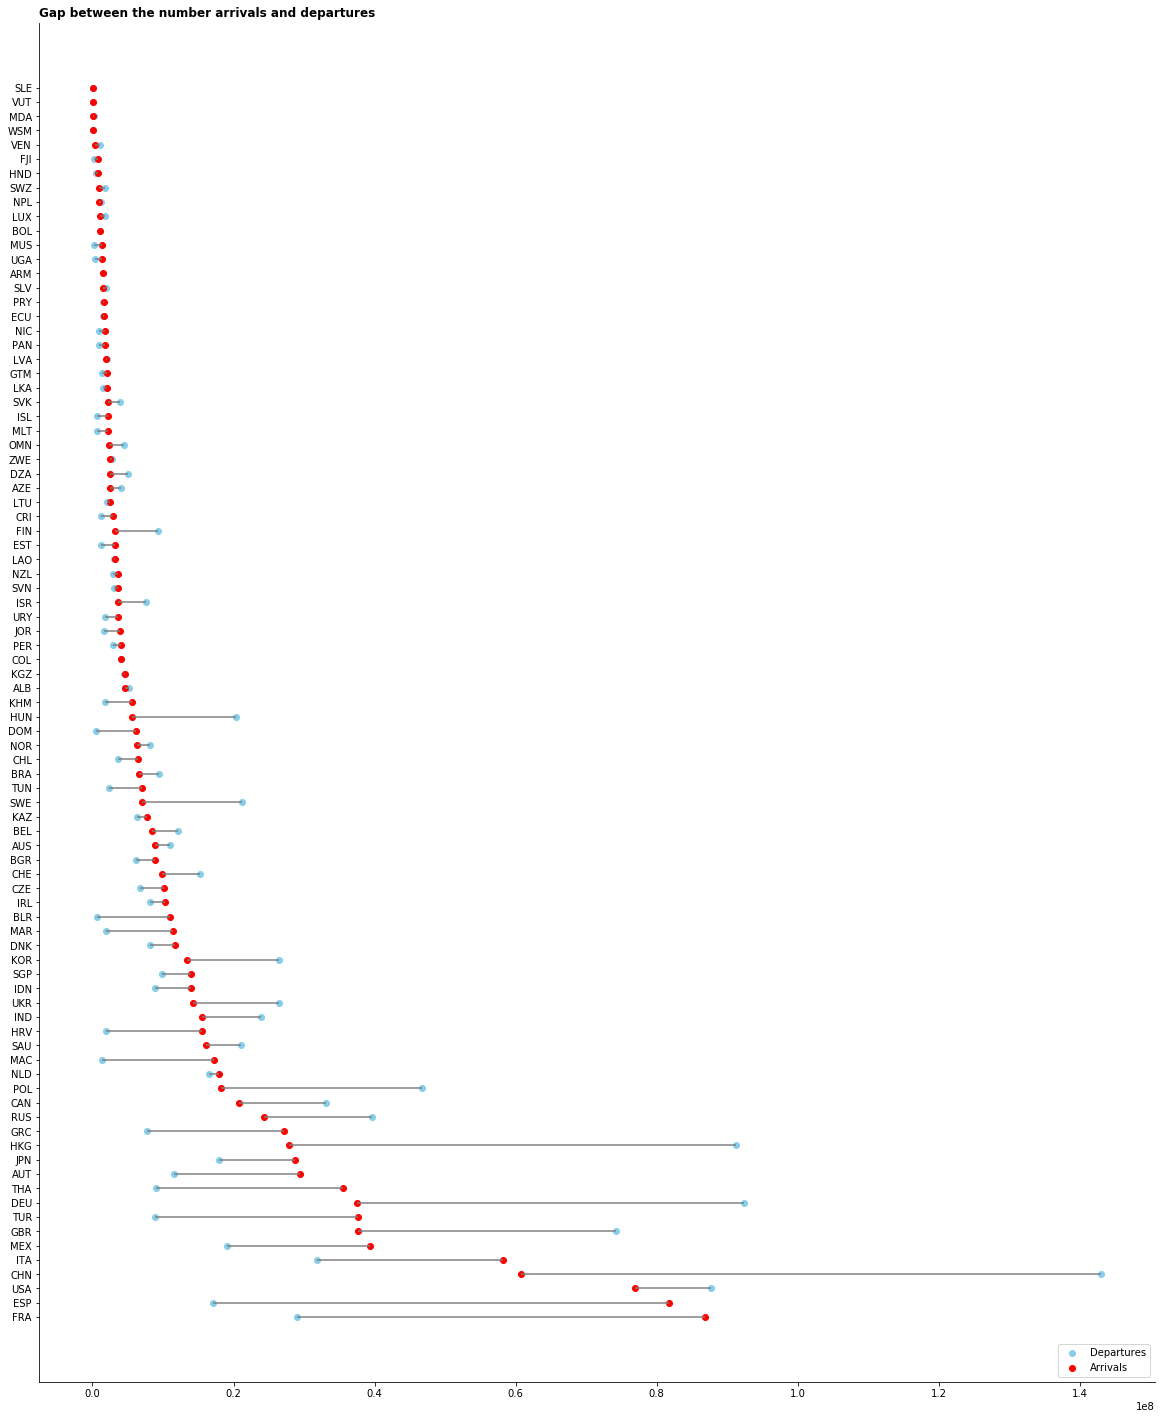

In [18]:
my_range=range(1,len(ordered_df.index)+1)
def gap(df):
    plt.figure(figsize = (20,25))
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.hlines(y=my_range, xmin=df['Arrivals'], xmax=df['Departures'], color='grey')
    plt.scatter(df['Departures'], my_range, color='skyblue',  label='Departures')     
    plt.scatter(df['Arrivals'], my_range, color='red' , label='Arrivals')
    plt.legend(loc = "lower right")
    plt.yticks(my_range, df['Country Code'])
   # plt.gca().get_yticklabels()[-10].set_color("red")
    plt.title("Gap between the number arrivals and departures", loc='left',fontweight = "bold")
    #plt.xlabel('%')
    plt.show()
    
gap(ordered_df)

#The red country is the first country that we analyse with more detail

### Correlation between all our variables

In [19]:
#Correlation between our variables
corr= dfnorm.corr()
corr

Arrivals  Departures  Rule of Law   CPI %  GDP PC  \
Arrivals          1.0000      0.6444       0.2555 -0.1219  0.2384   
Departures        0.6444      1.0000       0.2529 -0.1036  0.2186   
Rule of Law       0.2555      0.2529       1.0000 -0.4161  0.8027   
CPI %            -0.1219     -0.1036      -0.4161  1.0000 -0.2036   
GDP PC            0.2384      0.2186       0.8027 -0.2036  1.0000   
Unemployment %    0.1232     -0.1190      -0.0386  0.0523 -0.1386   

                Unemployment %  
Arrivals                0.1232  
Departures             -0.1190  
Rule of Law            -0.0386  
CPI %                   0.0523  
GDP PC                 -0.1386  
Unemployment %          1.0000

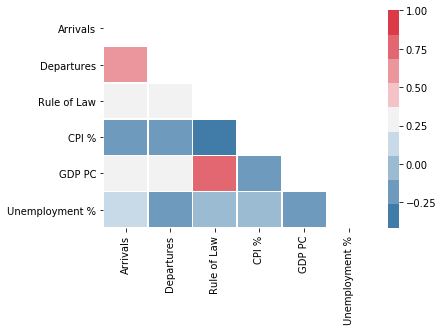

In [20]:
#Correlation plot
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#  #Colors
cmap = sns.diverging_palette(240, 10, n=9)
# # #Plotting the heatmap
sns.heatmap(corr, mask=mask, linewidths=.5, cmap=cmap)


### Relação entre as nossas variaveis em separado

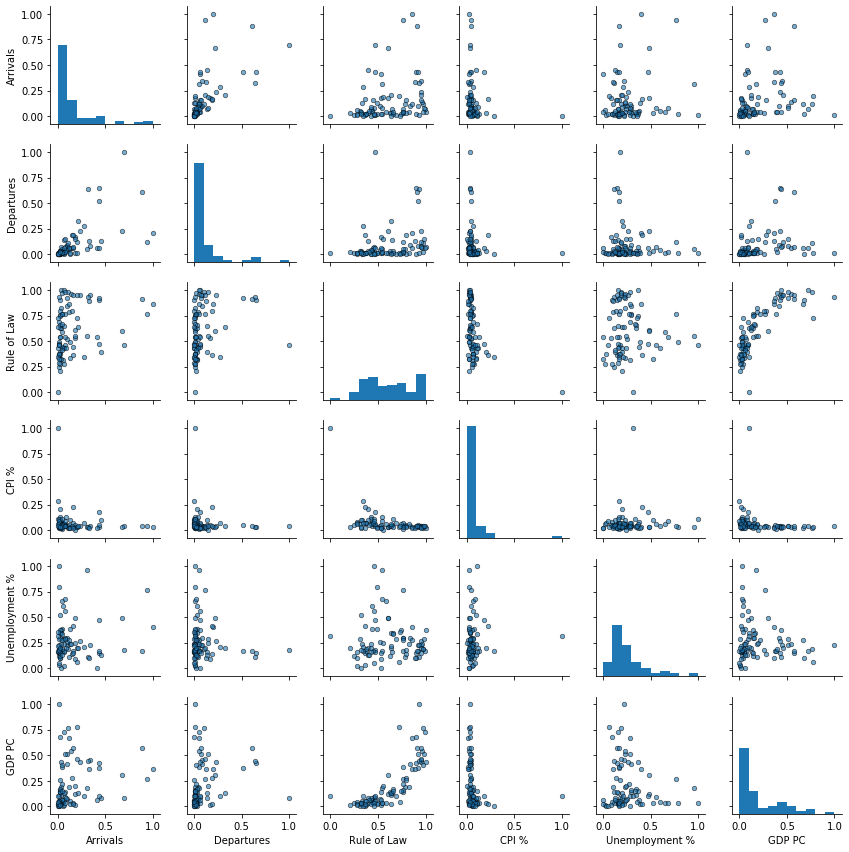

In [21]:
sns.pairplot(dfnorm[['Arrivals','Departures','Rule of Law','CPI %','Unemployment %','GDP PC']], diag_kind =  "hist", kind="scatter", palette = "husl", plot_kws={'alpha': 0.6, 's': 20, 'edgecolor':'k'}, height=2 )


### Regression of our variables

In [22]:
#Regression on arrivals , o que concluir? a ida para um país nao é muito influenciado pelas var

X = dfnorm[['Departures','Rule of Law','CPI %','Unemployment %','GDP PC']] 
y = dfnorm['Arrivals']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     14.57
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           3.58e-10
Time:                        11:49:49   Log-Likelihood:                 40.971
No. Observations:                  87   AIC:                            -69.94
Df Residuals:                      81   BIC:                            -55.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0104      0.071      0.

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [23]:
#SEM O GDP PC
X = dfnorm[['Departures','Rule of Law','CPI %','Unemployment %']] 
y = dfnorm['Arrivals']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     17.89
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           1.36e-10
Time:                        11:49:49   Log-Likelihood:                 40.354
No. Observations:                  87   AIC:                            -70.71
Df Residuals:                      82   BIC:                            -58.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0296      0.061     -0.

In [24]:
#SEM O RULE OF LAW
X = dfnorm[['Departures','GDP PC','CPI %','Unemployment %']] 
y = dfnorm['Arrivals']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     18.40
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           8.02e-11
Time:                        11:49:49   Log-Likelihood:                 40.927
No. Observations:                  87   AIC:                            -71.85
Df Residuals:                      82   BIC:                            -59.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0068      0.038     -0.

In [25]:
# SEM O UNEMPLOYMENT
X = dfnorm[['Departures','GDP PC','CPI %','Unemployment %']] 
y = dfnorm['Arrivals']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:               Arrivals   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     18.40
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           8.02e-11
Time:                        11:49:49   Log-Likelihood:                 40.927
No. Observations:                  87   AIC:                            -71.85
Df Residuals:                      82   BIC:                            -59.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0068      0.038     -0.

In [26]:
dfdiff = pd.DataFrame({'Country Code' : dfnorm.index , 'Actual' : y , 'Predicted' : est.predict()})
dfdiff = dfdiff.drop('Country Code',1)

dfdiff

Actual  Predicted
Country Code                   
ALB           0.0530     0.1651
ARM           0.0167     0.1889
AUS           0.1011     0.1627
AUT           0.3388     0.1575
AZE           0.0278     0.0510
BEL           0.0961     0.1741
BGR           0.1018     0.0930
BLR           0.1269     0.0489
BOL           0.0126     0.0263
BRA           0.0754     0.1832
CAN           0.2391     0.2859
CHE           0.1134     0.2087
CHL           0.0738     0.0940
CHN           0.6991     0.8443
COL           0.0469     0.1050
CRI           0.0336     0.0901
CZE           0.1165     0.0733
DEU           0.4309     0.5913
DNK           0.1348     0.1528
DOM           0.0708     0.0547
DZA           0.0277     0.1406
ECU           0.0180     0.0413
ESP           0.9415     0.2948
EST           0.0369     0.0720
FIN           0.0361     0.1792
FJI           0.0092     0.0331
FRA           1.0000     0.2902
GBR           0.4332     0.4889
GRC           0.3127     0.2792
GTM           0.0239     0.0209
...              ...        ...
NIC           0.0201     0.0337
NLD           0.2060     0.1808
NOR           0.0715     0.1551
NPL           0.0103     0.0019
NZL           0.0405     0.0951
OMN           0.0268     0.0584
PAN           0.0207     0.0475
PER           0.0460     0.0424
POL           0.2098     0.3128
PRY           0.0178     0.0453
RUS           0.2804     0.2712
SAU           0.1851     0.1905
SGP           0.1597     0.1470
SLE           0.0000     0.0106
SLV           0.0174     0.0459
SVK           0.0244     0.1119
SVN           0.0408     0.0963
SWE           0.0808     0.2321
SWZ           0.0101     0.2328
THA           0.4095     0.0485
TUN           0.0807     0.1615
TUR           0.4326     0.1496
UGA           0.0157    -0.0002
UKR           0.1634     0.2217
URY           0.0418     0.0904
USA           0.8857     0.5871
VEN           0.0044     0.0035
VUT           0.0008     0.0432
WSM           0.0012     0.0777
ZWE           0.0274     0.0546

[87 rows x 2 columns]

In [27]:
X= dfnorm[['Arrivals','Unemployment %','Rule of Law']] 
y = dfnorm['Departures']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             Departures   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     23.68
Date:                Tue, 29 Oct 2019   Prob (F-statistic):           3.62e-11
Time:                        11:49:49   Log-Likelihood:                 59.863
No. Observations:                  87   AIC:                            -111.7
Df Residuals:                      83   BIC:                            -101.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0262      0.042      0.

### Analise de clusters

In [28]:
dfcluster = dfnorm.loc[:,['Arrivals','Rule of Law', 'CPI %']].copy()
dfcluster

Arrivals  Rule of Law  CPI %
Country Code                              
ALB             0.0530       0.4328 0.0425
ARM             0.0167       0.4903 0.0271
AUS             0.1011       0.9194 0.0419
AUT             0.3388       0.9499 0.0439
AZE             0.0278       0.3969 0.2066
BEL             0.0961       0.8404 0.0445
BGR             0.1018       0.5171 0.0436
BLR             0.1269       0.3355 0.1033
BOL             0.0126       0.2445 0.0550
BRA             0.0754       0.4602 0.0644
CAN             0.2391       0.9473 0.0366
CHE             0.1134       0.9768 0.0206
CHL             0.0738       0.7629 0.0454
CHN             0.6991       0.4652 0.0365
COL             0.0469       0.4426 0.0774
CRI             0.0336       0.6329 0.0370
CZE             0.1165       0.7874 0.0494
DEU             0.4309       0.9022 0.0353
DNK             0.1348       0.9619 0.0298
DOM             0.0708       0.4290 0.0619
DZA             0.0277       0.3249 0.0966
ECU             0.0180       0.3629 0.0188
ESP             0.9415       0.7621 0.0420
EST             0.0369       0.8260 0.0639
FIN             0.0361       1.0000 0.0239
FJI             0.0092       0.4693 0.0630
FRA             1.0000       0.8625 0.0281
GBR             0.4332       0.9188 0.0510
GRC             0.3127       0.5462 0.0294
GTM             0.0239       0.2791 0.0791
...                ...          ...    ...
NIC             0.0201       0.3761 0.0705
NLD             0.2060       0.9540 0.0333
NOR             0.0715       0.9984 0.0408
NPL             0.0103       0.3688 0.0671
NZL             0.0405       0.9757 0.0404
OMN             0.0268       0.6276 0.0366
PAN             0.0207       0.5356 0.0257
PER             0.0460       0.4096 0.0547
POL             0.2098       0.6370 0.0438
PRY             0.0178       0.3746 0.0667
RUS             0.2804       0.3413 0.0679
SAU             0.1851       0.5498 0.0000
SGP             0.1597       0.9523 0.0212
SLE             0.0000       0.3442 0.2866
SLV             0.0174       0.3268 0.0278
SVK             0.0244       0.6600 0.0323
SVN             0.0408       0.7656 0.0340
SWE             0.0808       0.9788 0.0395
SWZ             0.0101       0.4604 0.1061
THA             0.4095       0.5369 0.0226
TUN             0.0807       0.5410 0.0924
TUR             0.4326       0.4682 0.1802
UGA             0.0157       0.4576 0.0909
UKR             0.1634       0.3605 0.2297
URY             0.0418       0.6634 0.1061
USA             0.8857       0.9107 0.0446
VEN             0.0044       0.0000 1.0000
VUT             0.0008       0.6406 0.0589
WSM             0.0012       0.7294 0.0389
ZWE             0.0274       0.2049 0.0262

[87 rows x 3 columns]

In [29]:
#Elbow graphic
continuous_features = ['Arrivals','Rule of Law', 'CPI %']
#dfcluster[continuous_features].describe()

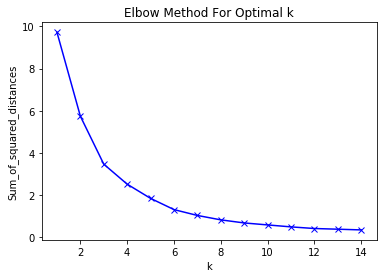

In [30]:
mms = MinMaxScaler()
mms.fit(dfcluster)
data_transformed = mms.transform(dfcluster)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

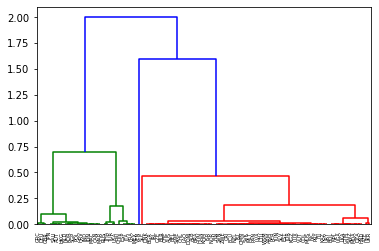

In [31]:
#Hierarchical clustering

distance = pdist(dfcluster)
link = linkage(dfcluster, metric = 'correlation', method = 'complete')
B = dendrogram(link,labels = list(dfcluster.index))


In [32]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[0:2])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

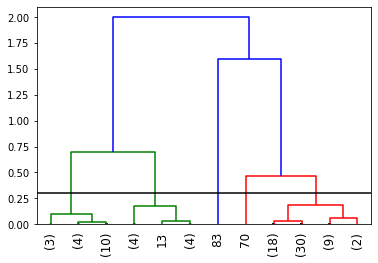

In [33]:
max_distance = 0.30 

dendrogram(
    link,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

if max_distance:
    plt.axhline(y = max_distance, c='k')

In [34]:
#kmeans
clusters = 5
kmeans = KMeans(n_clusters = clusters)
kmeans.fit(dfcluster)

dfcluster['Cluster'] = kmeans.labels_
dfcluster

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
ALB             0.0530       0.4328 0.0425        0
ARM             0.0167       0.4903 0.0271        0
AUS             0.1011       0.9194 0.0419        4
AUT             0.3388       0.9499 0.0439        4
AZE             0.0278       0.3969 0.2066        0
BEL             0.0961       0.8404 0.0445        4
BGR             0.1018       0.5171 0.0436        1
BLR             0.1269       0.3355 0.1033        0
BOL             0.0126       0.2445 0.0550        0
BRA             0.0754       0.4602 0.0644        0
CAN             0.2391       0.9473 0.0366        4
CHE             0.1134       0.9768 0.0206        4
CHL             0.0738       0.7629 0.0454        1
CHN             0.6991       0.4652 0.0365        2
COL             0.0469       0.4426 0.0774        0
CRI             0.0336       0.6329 0.0370        1
CZE             0.1165       0.7874 0.0494        1
DEU             0.4309       0.9022 0.0353        4
DNK             0.1348       0.9619 0.0298        4
DOM             0.0708       0.4290 0.0619        0
DZA             0.0277       0.3249 0.0966        0
ECU             0.0180       0.3629 0.0188        0
ESP             0.9415       0.7621 0.0420        2
EST             0.0369       0.8260 0.0639        4
FIN             0.0361       1.0000 0.0239        4
FJI             0.0092       0.4693 0.0630        0
FRA             1.0000       0.8625 0.0281        2
GBR             0.4332       0.9188 0.0510        4
GRC             0.3127       0.5462 0.0294        1
GTM             0.0239       0.2791 0.0791        0
...                ...          ...    ...      ...
NIC             0.0201       0.3761 0.0705        0
NLD             0.2060       0.9540 0.0333        4
NOR             0.0715       0.9984 0.0408        4
NPL             0.0103       0.3688 0.0671        0
NZL             0.0405       0.9757 0.0404        4
OMN             0.0268       0.6276 0.0366        1
PAN             0.0207       0.5356 0.0257        1
PER             0.0460       0.4096 0.0547        0
POL             0.2098       0.6370 0.0438        1
PRY             0.0178       0.3746 0.0667        0
RUS             0.2804       0.3413 0.0679        0
SAU             0.1851       0.5498 0.0000        1
SGP             0.1597       0.9523 0.0212        4
SLE             0.0000       0.3442 0.2866        0
SLV             0.0174       0.3268 0.0278        0
SVK             0.0244       0.6600 0.0323        1
SVN             0.0408       0.7656 0.0340        1
SWE             0.0808       0.9788 0.0395        4
SWZ             0.0101       0.4604 0.1061        0
THA             0.4095       0.5369 0.0226        1
TUN             0.0807       0.5410 0.0924        1
TUR             0.4326       0.4682 0.1802        0
UGA             0.0157       0.4576 0.0909        0
UKR             0.1634       0.3605 0.2297        0
URY             0.0418       0.6634 0.1061        1
USA             0.8857       0.9107 0.0446        2
VEN             0.0044       0.0000 1.0000        3
VUT             0.0008       0.6406 0.0589        1
WSM             0.0012       0.7294 0.0389        1
ZWE             0.0274       0.2049 0.0262        0

[87 rows x 4 columns]

In [35]:
cluster1=dfcluster.loc[dfcluster['Cluster'] == 0]
cluster2=dfcluster.loc[dfcluster['Cluster'] == 1]
cluster3=dfcluster.loc[dfcluster['Cluster'] == 2]
cluster4=dfcluster.loc[dfcluster['Cluster'] == 3]
cluster5=dfcluster.loc[dfcluster['Cluster'] == 4]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2], 
    marker = dict( size=2, color='green'),
    text = cluster1.index
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue'),
    text = cluster2.index

)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red'),
    text = cluster3.index

)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    marker = dict( size=2, color='yellow'),
    text = cluster4.index

)
scatter5 = dict(
    mode = "markers",
    name = "Cluster 5",
    type = "scatter3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    marker = dict( size=2, color='black'),
    text = cluster5.index

)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    color='yellow', showscale = True
)
cluster5 = dict(
    alphahull = 5,
    name = "Cluster 5",
    opacity = .1,
    type = "mesh3d",    
    x = cluster5.as_matrix()[:,0], y = cluster5.as_matrix()[:,1], z = cluster5.as_matrix()[:,2],
    color='black', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, scatter5, cluster1, cluster2, cluster3, cluster4, cluster5], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig)






//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

//anaconda3/lib/python3.7/site-packages/ipyker

In [36]:
cluster0 = pd.DataFrame(dfcluster.loc[dfcluster['Cluster'] == 0])
cluster0

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
ALB             0.0530       0.4328 0.0425        0
ARM             0.0167       0.4903 0.0271        0
AZE             0.0278       0.3969 0.2066        0
BLR             0.1269       0.3355 0.1033        0
BOL             0.0126       0.2445 0.0550        0
BRA             0.0754       0.4602 0.0644        0
COL             0.0469       0.4426 0.0774        0
DOM             0.0708       0.4290 0.0619        0
DZA             0.0277       0.3249 0.0966        0
ECU             0.0180       0.3629 0.0188        0
FJI             0.0092       0.4693 0.0630        0
GTM             0.0239       0.2791 0.0791        0
HND             0.0093       0.2823 0.0717        0
IDN             0.1612       0.4457 0.0698        0
KAZ             0.0882       0.4306 0.1245        0
KGZ             0.0521       0.3106 0.0603        0
KHM             0.0640       0.2800 0.0560        0
LAO             0.0370       0.3208 0.0250        0
MAR             0.1302       0.4888 0.0239        0
MDA             0.0012       0.4299 0.1114        0
MEX             0.4521       0.3943 0.1034        0
NIC             0.0201       0.3761 0.0705        0
NPL             0.0103       0.3688 0.0671        0
PER             0.0460       0.4096 0.0547        0
PRY             0.0178       0.3746 0.0667        0
RUS             0.2804       0.3413 0.0679        0
SLE             0.0000       0.3442 0.2866        0
SLV             0.0174       0.3268 0.0278        0
SWZ             0.0101       0.4604 0.1061        0
TUR             0.4326       0.4682 0.1802        0
UGA             0.0157       0.4576 0.0909        0
UKR             0.1634       0.3605 0.2297        0
ZWE             0.0274       0.2049 0.0262        0

In [37]:
cluster1 = pd.DataFrame(dfcluster.loc[dfcluster['Cluster'] == 1])
cluster1

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
BGR             0.1018       0.5171 0.0436        1
CHL             0.0738       0.7629 0.0454        1
CRI             0.0336       0.6329 0.0370        1
CZE             0.1165       0.7874 0.0494        1
GRC             0.3127       0.5462 0.0294        1
HRV             0.1791       0.6047 0.0295        1
HUN             0.0646       0.6503 0.0479        1
IND             0.1785       0.5278 0.0500        1
ISR             0.0411       0.7652 0.0162        1
JOR             0.0438       0.5877 0.0626        1
LKA             0.0239       0.5396 0.1284        1
LTU             0.0286       0.7584 0.0685        1
LVA             0.0220       0.7441 0.0566        1
MAC             0.1983       0.7248 0.0310        1
MLT             0.0257       0.7937 0.0331        1
MUS             0.0150       0.6858 0.0677        1
OMN             0.0268       0.6276 0.0366        1
PAN             0.0207       0.5356 0.0257        1
POL             0.2098       0.6370 0.0438        1
SAU             0.1851       0.5498 0.0000        1
SVK             0.0244       0.6600 0.0323        1
SVN             0.0408       0.7656 0.0340        1
THA             0.4095       0.5369 0.0226        1
TUN             0.0807       0.5410 0.0924        1
URY             0.0418       0.6634 0.1061        1
VUT             0.0008       0.6406 0.0589        1
WSM             0.0012       0.7294 0.0389        1

In [38]:
cluster2 = pd.DataFrame(dfcluster.loc[dfcluster['Cluster'] == 2])
cluster2

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
CHN             0.6991       0.4652 0.0365        2
ESP             0.9415       0.7621 0.0420        2
FRA             1.0000       0.8625 0.0281        2
ITA             0.6705       0.6025 0.0310        2
USA             0.8857       0.9107 0.0446        2

In [39]:
cluster3 = pd.DataFrame(dfcluster.loc[dfcluster['Cluster'] == 3])
cluster3

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
VEN             0.0044       0.0000 1.0000        3

In [40]:
cluster4 = pd.DataFrame(dfcluster.loc[dfcluster['Cluster'] == 4])
cluster4

Arrivals  Rule of Law  CPI %  Cluster
Country Code                                       
AUS             0.1011       0.9194 0.0419        4
AUT             0.3388       0.9499 0.0439        4
BEL             0.0961       0.8404 0.0445        4
CAN             0.2391       0.9473 0.0366        4
CHE             0.1134       0.9768 0.0206        4
DEU             0.4309       0.9022 0.0353        4
DNK             0.1348       0.9619 0.0298        4
EST             0.0369       0.8260 0.0639        4
FIN             0.0361       1.0000 0.0239        4
GBR             0.4332       0.9188 0.0510        4
HKG             0.3207       0.9278 0.0348        4
IRL             0.1186       0.8601 0.0177        4
ISL             0.0251       0.9018 0.0390        4
JPN             0.3300       0.8924 0.0196        4
KOR             0.1531       0.7983 0.0418        4
LUX             0.0116       0.9324 0.0386        4
NLD             0.2060       0.9540 0.0333        4
NOR             0.0715       0.9984 0.0408        4
NZL             0.0405       0.9757 0.0404        4
SGP             0.1597       0.9523 0.0212        4
SWE             0.0808       0.9788 0.0395        4

In [41]:
array = cluster2.index.tolist()
tsnorm =  df_final.loc[df_final['Country Code'].isin(array)]
tsgrouped = tsnorm.copy()
tsgrouped.set_index(['Country Code','Years'], inplace=True)
tsgrouped = tsgrouped.groupby(['Country Code','Years']).sum()

tsgrouped

Arrivals  Departures  Rule of Law   CPI %      GDP PC  \
Country Code Years                                                          
CHN          2007   54720000    40954000      -0.5422  4.8168  2,693.9698   
             2008   53049000    45844000      -0.4198  5.9253  3,468.3045   
             2009   50875000    47656000      -0.4071 -0.7282  3,832.2360   
             2010   55664000    57386000      -0.4099  3.1753  4,550.4536   
             2011   57581000    70250000      -0.4648  5.5539  5,618.1325   
             2012   57725000    83182000      -0.5429  2.6195  6,316.9189   
             2013   55686000    98185000      -0.5246  2.6210  7,050.6459   
             2014   55622000   116593000      -0.4145  1.9216  7,651.3660   
             2015   56886000   127860000      -0.4098  1.4370  8,033.3880   
             2016   59270000   135130000      -0.3344  2.0000  8,078.7905   
             2017   60740000   143035000      -0.2630  1.5931  8,759.0416   
ESP          2007   58666000    11276000       1.1683  2.7870 32,709.4010   
             2008   57192000    11229000       1.1935  4.0757 35,579.3099   
             2009   52178000    12017000       1.1626 -0.2880 32,334.0055   
             2010   52677000    12379000       1.1889  1.7999 30,736.6279   
             2011   56177000    13347000       1.1981  3.1961 31,835.2888   
             2012   57464000    12422000       1.0648  2.4460 28,563.8590   
             2013   60675000    11246000       1.0205  1.4085 29,211.7737   
             2014   64939000    11783000       0.9526 -0.1509 29,623.1644   
             2015   68175000    14407000       0.9016 -0.5005 25,817.3866   
             2016   75315000    15405000       0.9788 -0.2027 26,622.2991   
             2017   81786000    17031000       1.0085  1.9561 28,208.2611   
FRA          2007   80853000    28103000       1.4723  1.4880 41,508.4340   
             2008   79218000    25506000       1.5071  2.8129 45,334.1144   
             2009   76764000    25140000       1.4527  0.0876 41,575.4187   
             2010   76647000    25041000       1.5197  1.5311 40,638.3340   
             2011   80499000    26155000       1.4470  2.1116 43,790.7320   
             2012   81980000    25317000       1.4542  1.9542 40,874.7035   
             2013   83634000    26062000       1.4268  0.8637 42,592.9341   
             2014   83701000    27919000       1.4746  0.5078 43,008.6474   
             2015   84452000    26648000       1.4133  0.0375 36,613.3752   
             2016   82682000    26483000       1.4131  0.1833 36,962.2223   
             2017   86861000    29055000       1.4383  1.0323 38,679.1271   
ITA          2007   43654000    25789000       0.4787  1.8297 37,698.7866   
             2008   42734000    26464000       0.4551  3.3478 40,640.1839   
             2009   43239000    27490000       0.4047  0.7748 36,976.8455   
             2010   43626000    28188000       0.4303  1.5255 35,849.3732   
             2011   46119000    27831000       0.4665  2.7806 38,334.6838   
             2012   46360000    27376000       0.4033  3.0414 34,814.1251   
             2013   47704000    26305000       0.4029  1.2200 35,370.2753   
             2014   48576000    26862000       0.3774  0.2410 35,396.6657   
             2015   50732000    27494000       0.2751  0.0388 30,170.5166   
             2016   52372000    29067000       0.3292 -0.0940 30,830.9227   
             2017   58253000    31805000       0.3246  1.2265 32,155.2059   
USA          2007   56135000    64049000       1.6279  2.8527 47,975.9677   
             2008   58007000    63653000       1.6400  3.8391 48,382.5584   
             2009   55103000    62130000       1.5985 -0.3555 47,099.9805   
             2010   60010000    61061000       1.6381  1.6400 48,466.8234   
             2011   62821000    59209000       1.6000  3.1568 49,883.1140   
             2012   66657000    60697000       1.6273  2.0693 51,603.4973   
             201

# TIME SERIES


In [42]:
#Time series : 

def plot_graph (dataframe):
    
    plt.xlabel('Years')
    plt.ylabel('Number of Arrivals')
    plt.plot(dataframe)
    
#Determing rolling statistics for the real values
mean=0
std=0
def real_stat (dataframe):
    
    mean = dataframe.rolling(window=1).mean()
    std = dataframe.rolling(window=1).std()
    print(mean,std)
    return(mean,std)

#ploting rolling stat:
def plot_stat (dataframe, mean, std):
    
    original = plt.plot(dataframe, color='blue', label='Original')
    mean = plt.plot(mean, color='red', label='Mean')
    std = plt.plot(std, color='black',label='Std')
    plt.legend(loc='best')
    plt.title('Mean and Std deviation')
    plt.show(block=False)
    
def melt_arrivals(dataframe,variavel):
    df= pd.melt(dataframe,id_vars = ['Country Code'], value_vars = dataframe.iloc[:, 1:21], value_name = variavel ,var_name = 'Years')
    return df
    
def treat_arrivals(dataframe):
    df=dataframe.drop('Country Code',1)
    df=df.set_index('Years')
    return df



In [43]:

#china
ch = arrivals.loc[arrivals['Country Code']=='CHN']
ch = ch.loc[:,['Country Code','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
ch = melt_arrivals(ch,'arrivals')
ch = treat_arrivals(ch)

#Spain
es = arrivals.loc[arrivals['Country Code']=='ESP']
es = es.loc[:,['Country Code','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
es = melt_arrivals(es,'arrivals')
es = treat_arrivals(es)

#France
fr = arrivals.loc[arrivals['Country Code']=='FRA']
fr=fr.loc[:,['Country Code','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
fr = melt_arrivals(fr,'arrivals')
fr = treat_arrivals(fr)

#USA
usa = arrivals.loc[arrivals['Country Code']=='USA']
usa = usa.loc[:,['Country Code','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
usa = melt_arrivals(usa,'arrivals')
usa = treat_arrivals(usa)

#Italy
ita = arrivals.loc[arrivals['Country Code']=='ITA']
ita = ita.loc[:,['Country Code','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
ita = melt_arrivals(ita,'arrivals')
ita = treat_arrivals(ita)

#fr

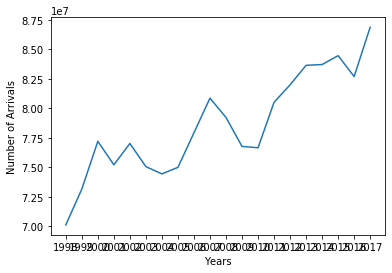

In [44]:
#Verificar tendencia das arrivals em França

plot_graph(fr)

In [45]:
result = adfuller(fr['arrivals'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.


ADF Statistic: -0.274575
p-value: 0.929029


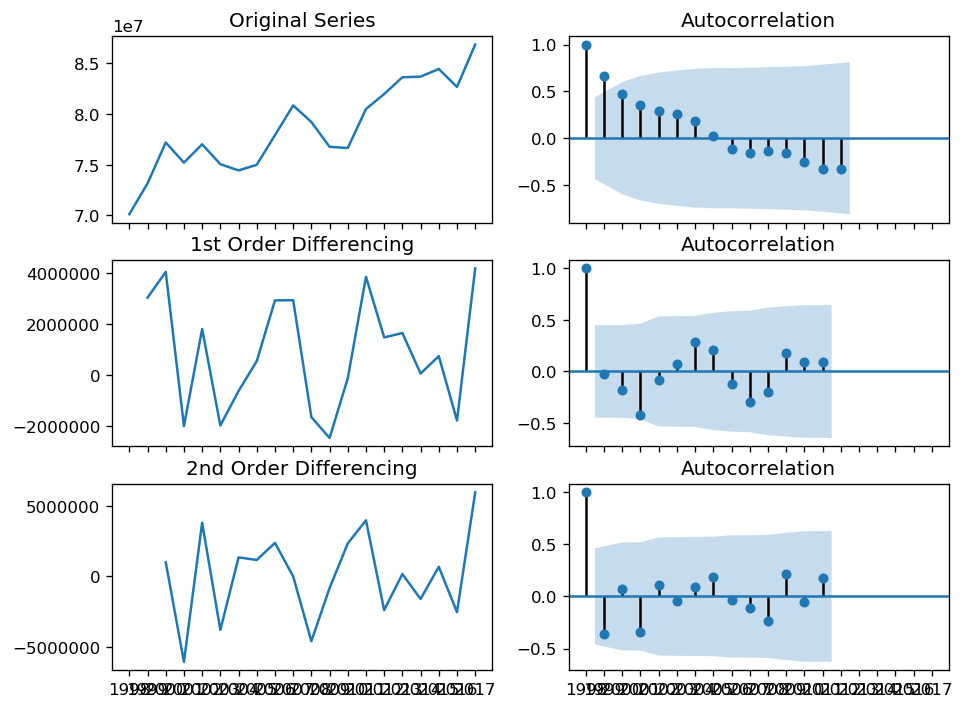

In [46]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(fr['arrivals']); axes[0, 0].set_title('Original Series')
plot_acf(fr['arrivals'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(fr['arrivals'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(fr['arrivals'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(fr['arrivals'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(fr['arrivals'].diff().diff().dropna(), ax=axes[2, 1])


plt.show()

#For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.
# I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).


//anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



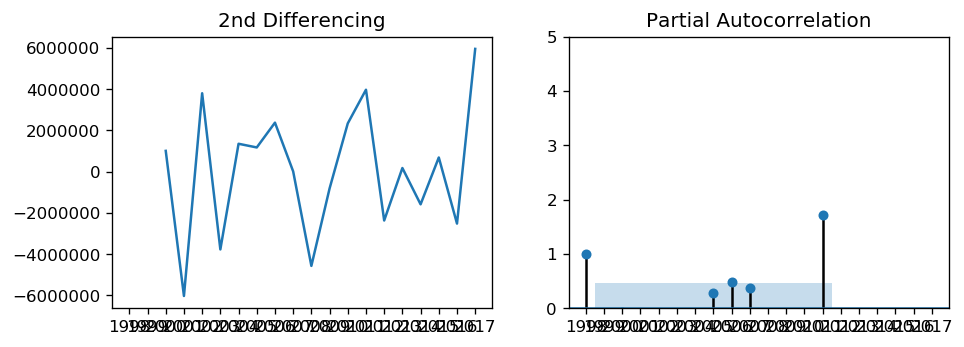

In [47]:
#Find p (AR, partial)
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(fr['arrivals'].diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(fr['arrivals'].diff().diff().dropna(), ax=axes[1])

plt.show()

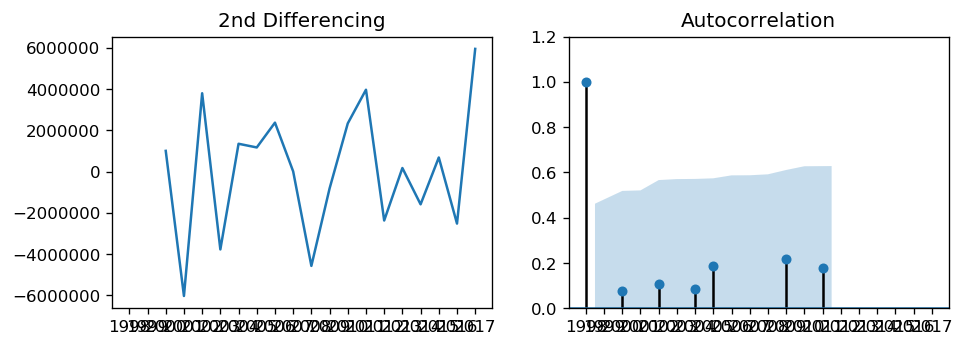

In [48]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(fr['arrivals'].diff().diff()); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(fr['arrivals'].diff().diff().dropna(), ax=axes[1])

plt.show()

In [49]:
# 0,2,2 ARIMA Model
model = ARIMA(fr['arrivals'], order=(0,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D2.arrivals   No. Observations:                   18
Model:                 ARIMA(0, 2, 2)   Log Likelihood                -290.329
Method:                       css-mle   S.D. of innovations        2265096.624
Date:                Tue, 29 Oct 2019   AIC                            588.659
Time:                        11:50:00   BIC                            592.220
Sample:                    01-01-2000   HQIC                           589.150
                         - 01-01-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.339e+04   1.13e+05      0.559      0.584   -1.59e+05    2.86e+05
ma.L1.D2.arrivals    -0.9115      0.343     -2.661      0.018      -1.583      -0.240
ma.L2.D2.arrivals    -0.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



In [50]:
# 0,2,1 ARIMA Model
model = ARIMA(fr['arrivals'], order=(0,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



                             ARIMA Model Results                              
Dep. Variable:            D2.arrivals   No. Observations:                   18
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -290.379
Method:                       css-mle   S.D. of innovations        2261515.370
Date:                Tue, 29 Oct 2019   AIC                            586.758
Time:                        11:50:00   BIC                            589.429
Sample:                    01-01-2000   HQIC                           587.127
                         - 01-01-2017                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.339e+04   9.76e+04      0.650      0.525   -1.28e+05    2.55e+05
ma.L1.D2.arrivals    -0.9998      0.200     -5.008      0.000      -1.391      -0.609
                        

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



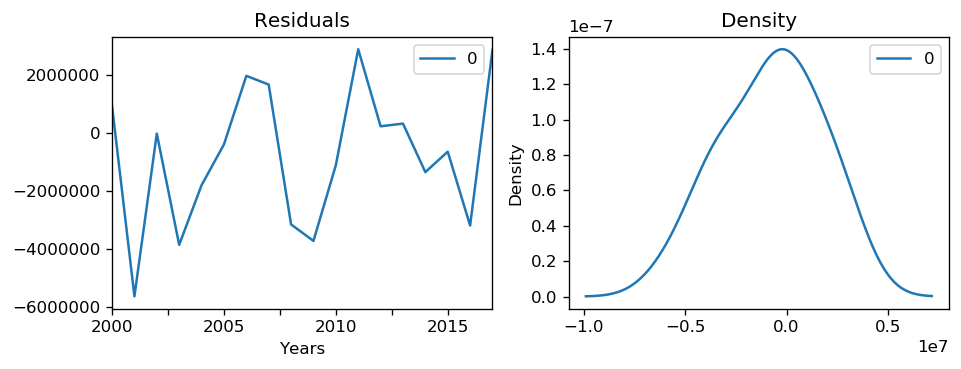

In [51]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


#The residual errors seem fine with near zero mean and uniform variance.



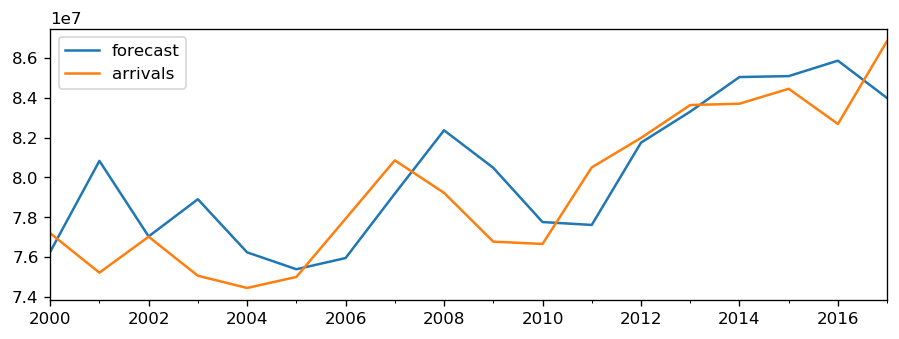

In [52]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

#When you set dynamic=False the in-sample lagged values are used for prediction.


In [53]:
#Cross Validation:

from statsmodels.tsa.stattools import acf

# Create Training and Test
train = fr['arrivals'][:15]
test = fr['arrivals'][15:]

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

//anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



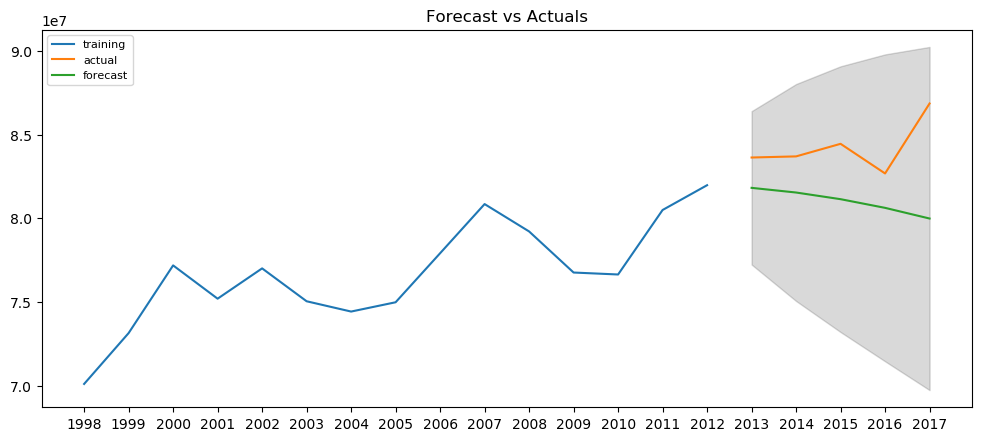

In [54]:
# Build Model 
model = ARIMA(train, order=(0, 2, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


#But each of the predicted forecasts is consistently below the actuals. 

In [55]:
#ABDALLAH HELP

#from statsmodels.tsa.arima_model import ARIMA
#import pmdarima as pm

#model = pm.auto_arima(fr['arrivals'], start_p=1, start_q=1,
 #                     test='adf',       # use adftest to find optimal 'd'
  #                    max_p=3, max_q=3, # maximum p and q
   #m=1,              # frequency of series
    #                  d=None,           # let model determine 'd'
     #                 seasonal=False,   # No Seasonality
      #                start_P=0, 
       #               D=0, 
        #              trace=True,
         #             error_action='ignore',  
          #            suppress_warnings=True, 
           #           stepwise=True)

#print(model.summary())
#site:https://github.com/tgsmith61591/pmdarima/issues/124